In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [27]:
df = pd.read_csv("homeprices.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [52]:
df.columns

Index(['area', 'price'], dtype='object')

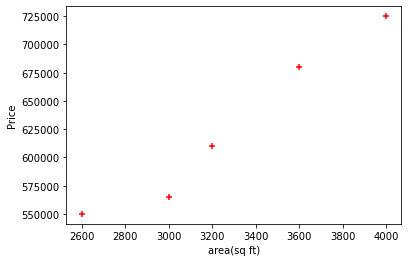

In [28]:
%matplotlib inline
plt.xlabel("area(sq ft)")
plt.ylabel("Price")
plt.scatter(df.area,df.price,color='red',marker='+') # both are working
# plt.scatter(df[["area"]],df[["price"]]) # same as upper

In [31]:
reg = linear_model.LinearRegression()
#reg.fit(df[['area']],df[['price']])
reg.fit(df[['area']],df.price)
#reg.fit(df.area,df.price)

LinearRegression()

In [33]:
reg.predict(np.array([3300]).reshape(1, 1))

array([628715.75342466])

In [35]:
reg.coef_

array([135.78767123])

In [36]:
reg.intercept_

180616.43835616432

In [37]:
# it is actually mx+b and here m = 135.78767123 and b = 180616.43835616432 and x = 3300
3300*135.78767123+ 180616.43835616432

628715.7534151643

### Another DataFrame

In [38]:
d = pd.read_csv('areas.csv')

In [39]:
d.head(3)

,area
0,1000
1,1500
2,2300


In [41]:
p = reg.predict(d)

In [42]:
d["price"]  = p

In [43]:
d.head()

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [44]:
d.to_csv('prediction.csv')
#d.to_csv('prediction.csv',index = False) # if you want to remove indeces from prediction.csv file

In [47]:
pd.read_csv('prediction.csv').head(3)

,Unnamed: 0,area,price
0,0,1000,316404.109589
1,1,1500,384297.945205
2,2,2300,492928.082192


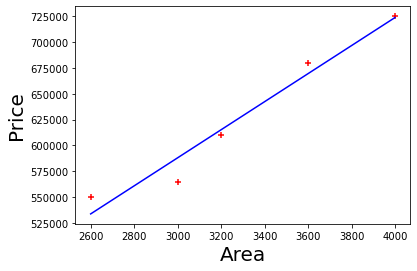

In [51]:
%matplotlib inline
plt.xlabel("Area",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')